## **TASK 1 - Prediction using Supervised ML**

To Predict the percentage of marks of the students based on the number of hours they studied

**Submitted By: Madhura KR** 

In [1]:
# importing the required libraries
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [45]:
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
df = pd.read_csv(url)

In [46]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


#### Data Understanding and Data Pre-processing

In [4]:
df.shape

(25, 2)

In [5]:
#Finding missing values
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [6]:
# To find more information about our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### EDA

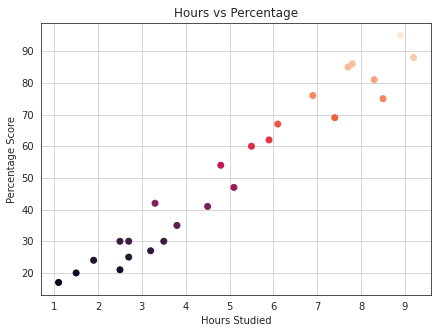

In [28]:
# Plotting the dataset
sns.set_style('white')
plt.rcParams["figure.figsize"] = [7,5]
y=df['Scores'].values
plt.scatter(df['Hours'].values,df['Scores'].values,  c=y)
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.grid()
plt.show()

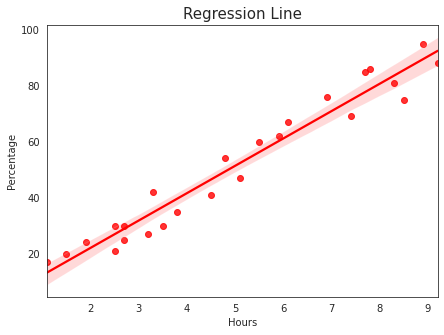

In [29]:
sns.set_style('white')
sns.regplot(x= df['Hours'], y= df['Scores'], color= 'red')
plt.title('Regression Line',size=15)
plt.ylabel('Percentage')
plt.xlabel('Hours')
plt.show()

**From the plot above, a linear relationship is seen between the two variables 'Hours studied' and 'Percentage Score'.Therefore, a linear regression supervised machine model would best fit the data.**

In [9]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


**The correlation further supports the earlier finding about the linear association between the variables.**

### Training the Model
**Splitting the Data**

In [48]:
# Defining X and y from the Data
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values

#Creating the test train split first
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state = 0)

**Fitting the Data into the Model**

In [50]:
model = LinearRegression()
model.fit(X_train,  y_train)
print("---------Model Trained---------")

---------Model Trained---------


**Visualizing the model**

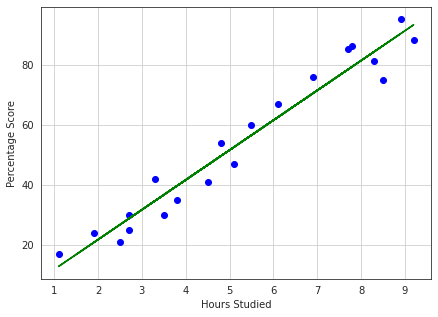

In [51]:
line = model.coef_*X + model.intercept_

# Plotting for the training data
plt.rcParams["figure.figsize"] = [7,5]
plt.scatter(X_train, y_train, color='blue')
plt.plot(X, line, color='green');
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score') 
plt.grid()
plt.show()


**Predicting the Percentage of Marks**

In [52]:
pred_y = model.predict(X_test)
prediction = pd.DataFrame({'Hours': [i[0] for i in X_test], 'Predicted Marks': [k for k in pred_y]})
prediction.head()

,Hours,Predicted Marks
0,1.5,16.884145
1,3.2,33.732261
2,7.4,75.357018
3,2.5,26.794801
4,5.9,60.491033


In [53]:
compare_scores = pd.DataFrame({'Actual Marks': y_test, 'Predicted Marks': pred_y})
compare_scores.head()

,Actual Marks,Predicted Marks
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


**Evaluating the Model**

In [54]:
# Calculating the accuracy of the model
print('Mean Absolute Error :',metrics.mean_absolute_error(y_test, pred_y))
print('Root Mean Square Error :',math.sqrt(metrics.mean_squared_error(y_test, pred_y)))

Mean Absolute Error : 4.183859899002982
Root Mean Square Error : 4.647447612100373


**Check for overfitting and underfitting**

In [58]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(model.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(model.score(X_test, y_test)))

Training set score: 0.9516
Test set score: 0.9455


**Since the train score and test score are quite comparable, there is no sign of overfitting.**

**What will be the predicted score of a student if he/she studies for 9.25 hrs/ day?**

In [55]:
hours = 9.25
own_pred = model.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737539
